# Female Births

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv("datos/daily-total-female-births.csv")

In [3]:
data.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Births  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


## Análisis Exploratorio

In [6]:
print(f"Rango de fechas: {data.index.min().date()} a {data.index.max().date()}")
print(f"Número de días registrados: {data.shape[0]}")

Rango de fechas: 1959-01-01 a 1959-12-31
Número de días registrados: 365


**Mostrar distribución de nacimientos por día**

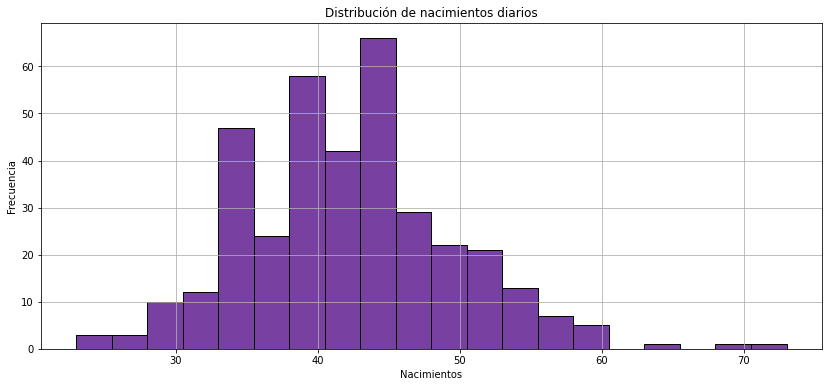

In [7]:
plt.figure(figsize=(14, 6))
sns.histplot(data["Births"], bins=20, color="indigo")
plt.title("Distribución de nacimientos diarios")
plt.xlabel("Nacimientos")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


**Serie de Tiempo**

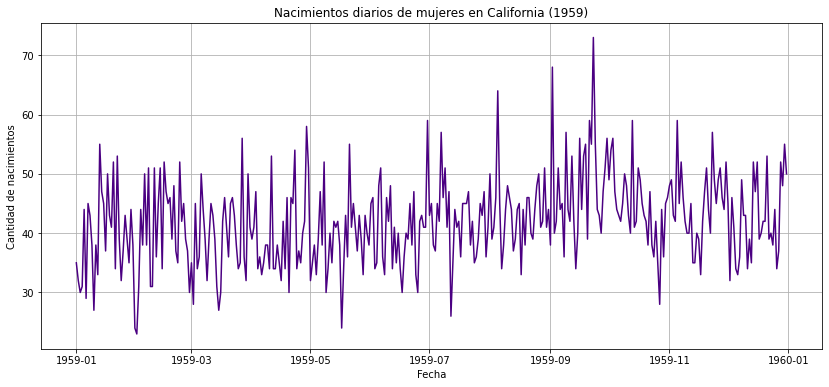

In [8]:

plt.figure(figsize=(14, 6))
sns.lineplot(data=data, x=data.index, y="Births", color="indigo")
plt.title("Nacimientos diarios de mujeres en California (1959)")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de nacimientos")
plt.grid(True)
plt.show()


La serie de tiempo representa la cantidad de nacimientos femeninos registrados cada día en California a lo largo del año 1959. A simple vista, se observa una alta variabilidad diaria, con valores que oscilan aproximadamente entre 30 y 70 nacimientos.

No se aprecia una tendencia clara ascendente o descendente a lo largo del año; sin embargo, sí pueden identificarse cambios en los niveles generales en ciertos tramos. Por ejemplo, hacia mediados y finales del año parecen concentrarse varios de los valores más altos. A pesar de ello, los picos elevados no se mantienen en el tiempo, lo que sugiere que estos son eventos aislados más que parte de una tendencia sostenida.

No se percibe una estacionalidad definida, aunque podrían existir patrones débiles o irregulares que no son fácilmente detectables visualmente sin un análisis más profundo.


**Descomposición aditiva**

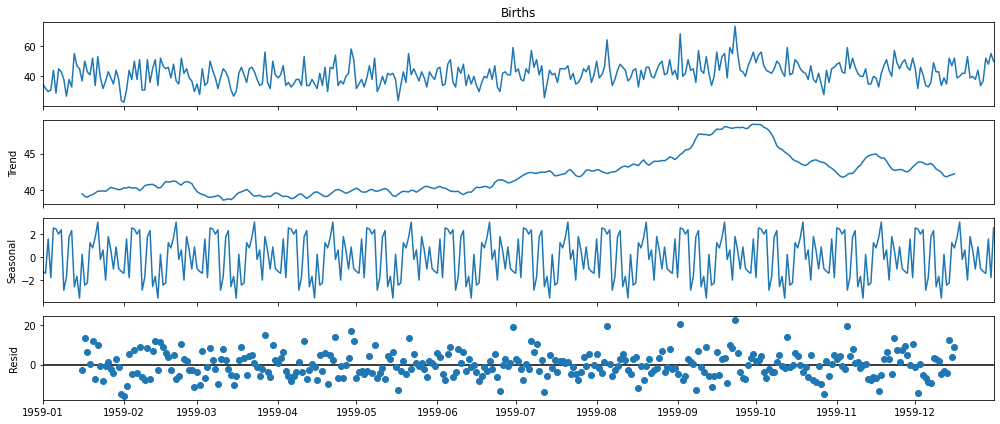

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose


result = seasonal_decompose(data["Births"], model="additive", period=30)

plt.rcParams["figure.figsize"] = (14, 6)

result.plot()
plt.tight_layout()
plt.show()


Al observar la componente de tendencia, se puede identificar un patrón de crecimiento progresivo a lo largo del año. A partir de mediados de julio, la tendencia comienza a incrementarse de manera más pronunciada, alcanzando su punto más alto alrededor de septiembre. Posteriormente, esta tendencia desciende levemente hacia el cierre del año, el cual muestra un comportamiento más marcado en el segundo semestre.

En cuanto a la estacionalidad, se evidencia un comportamiento cíclico que se repite aproximadamente cada 30 días. Este patrón periódico indica la existencia de ciertos días del mes en los que tienden a registrarse más nacimientos, y otros en los que los nacimientos tienden a disminuir.

Por último, los residuos representan las variaciones que no pueden explicarse ni por la tendencia general ni por el componente estacional. En este caso, la mayoría de los residuos se distribuyen alrededor de cero, lo cual es una buena señal de que el modelo ha capturado adecuadamente la estructura principal de la serie. Sin embargo, algunos valores atípicos sobresalen, lo cual podría indicar la existencia de ciertos días con comportamientos inesperados en el número de nacimientos.

## Promedios Móviles

In [ ]:
data["PM_30"] = data["Births"].rolling(window=30).mean()


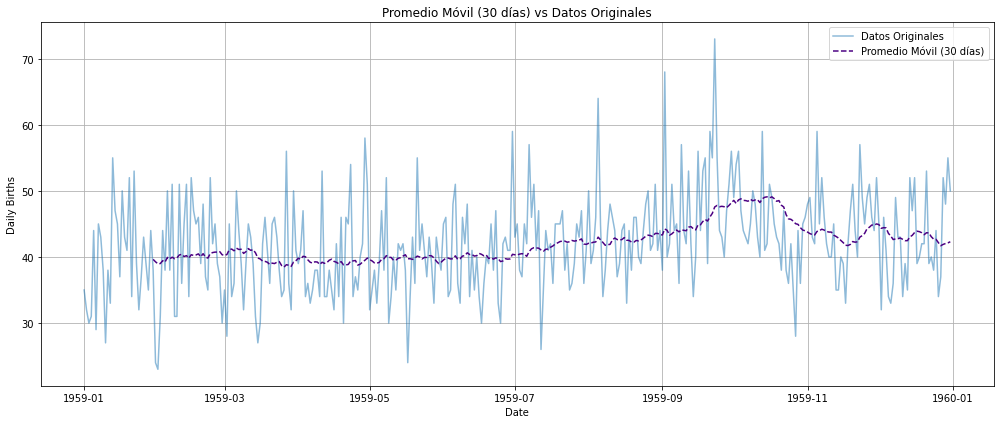

In [17]:

plt.figure(figsize=(14, 6))
plt.plot(data.index, data["Births"], label="Datos Originales", alpha=0.5)
plt.plot(data.index, data["PM_30"], label="Promedio Móvil (30 días)", linestyle="--", color="indigo")

plt.title("Promedio Móvil (30 días) vs Datos Originales")
plt.xlabel("Date")
plt.ylabel("Daily Births")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


El promedio móvil de 30 días fue aplicado a la serie original de nacimientos. Esta técnica tiene como objetivo reducir la variabilidad diaria y facilitar la observación de patrones generales a lo largo del tiempo. Al eliminar las variaciones más pequeñas, se obtiene una curva que representa de forma más clara la tendencia central del fenómeno.

Al comparar la serie original con su versión suavizada, se puede notar que los datos diarios presentan una alta variabilidad, con picos abruptos y caídas frecuentes. En cambio, la curva del promedio móvil se comporta de manera más estable y continua. Esto permite identificar con mayor claridad periodos de aumento o disminución sostenida en la cantidad de nacimientos.

En particular, la serie suavizada muestra un incremento moderado hacia el último trimestre del año, seguido de una ligera disminución en diciembre. Este tipo de análisis visual puede ser útil para detectar posibles patrones estacionales o contextuales, incluso si no se cuenta con información adicional sobre los factores externos que los explican.

## Alisamiento exponencial